# Importing Libraries

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

from regression_analysis.fit_model import linear_regression
from regression_analysis.utils import franke
from regression_analysis.utils.plots import triangulation_for_triheatmap as triheatmap
from regression_analysis.fit_model.apply_regression import plot_stat, apply_regression
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.tri import Triangulation
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model

import ipywidgets as widget
from ipywidgets import interact, interactive, fixed, interact_manual

import glob as glob
from IPython.display import Image, display, HTML, Video

import multiprocessing as mp

import os
if not os.path.exists('data'):
    os.makedirs('data')
#note my bootstrap can be wrong. 

print("Number of processors: ", mp.cpu_count())

Number of processors:  8


# Demo for applying regression to Franke data 

In [13]:
n = 50 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

y = franke.Franke(xx1, xx2, noise_var=0.1) #zero mean gaussian noise has variance = var

In [14]:
#create linear regression object by passing input and output data
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 

## Apply OLS 

In [5]:
print("own OLS")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

print('\n'+ "Scikit OLS")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

own OLS
Train MSE 0.0014126347636528253
Test MSE 0.0013145411727650406
Train R2 0.9744838029669505
Test R2 0.9768195256295
Train bias 0.05536227682452565
Test bias 0.0567090619625419
Train model variance 0.05394964205831307
Test model variance 0.05438354692325089

Scikit OLS
Train MSE 0.0013929538703990145
Test MSE 0.0014915835926757183
Train R2 0.9749945222516256
Test R2 0.9721776009541776
Train bias 0.055705949089077875
Test bias 0.053610953292336776
Train model variance 0.0543129952186768
Test model variance 0.05255210272886834


## Apply OLS with bootstrap sampling

In [6]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0014067675471753657
Test MSE 0.0014103193955411258
Train R2 0.9747663879479324
Test R2 0.9745086104106666
Train bias 0.0019002557467654058
Test bias 0.0018223099016133188
Train model variance 0.001850850625745054
Test model variance 0.0017713316333006991


## Apply OLS with cross validation sampling

In [7]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0014020279882006508
Test MSE 0.001412076843308354
Train R2 0.9747363167751422
Test R2 0.9745099399720651
Train bias 0.00554561899401155
Test bias 0.005581679688817296
Train model variance 0.005405053808021785
Test model variance 0.005449051025888309


## Apply Ridge regression 

In [8]:
print("own ridge")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

print('\n'+"scikit ridge")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

own ridge
Train MSE 0.005651764246959664
Test MSE 0.005895361478811566
Train R2 0.8982458294872186
Test R2 0.8929214950892645
Train bias 0.05554332538004511
Test bias 0.05506541835822038
Train model variance 0.047947144149584786
Test model variance 0.049716464816741246

scikit ridge
Train MSE 0.005683437680601617
Test MSE 0.005562990392366794
Train R2 0.8974202276351828
Test R2 0.9011330529711792
Train bias 0.055405059938820944
Test bias 0.056280867106721456
Train model variance 0.04776954510083508
Test model variance 0.049417776143669594


## Apply Ridge regression with bootstrap

In [9]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, reg_method="ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.005662459116772087
Test MSE 0.0057192886485153745
Train R2 0.8978058249176397
Test R2 0.8969483366424541
Train bias 0.0018471099656098566
Test bias 0.0018672804265049072
Train model variance 0.001587944985038572
Test model variance 0.0015870385329321236


## Apply Ridge regression with cross validation

In [10]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, reg_method="ridge", lmbda=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.003587540900666493
Test MSE 0.003594740706259441
Train R2 0.9353551036473119
Test R2 0.935157493718284
Train bias 0.0055537911027326295
Test bias 0.005508587132044263
Train model variance 0.00500167993888742
Test model variance 0.005092737240484365


## Apply Lasso regression: Not working properly. High R2 value

In [15]:
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_lasso", lmbda=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)


Train MSE 0.06519116835882224
Test MSE 0.07067078942457657
Train R2 -0.1811884092575382
Test R2 -0.21716900458814936
Train bias 0.06519116835882224
Test bias 0.07067078942457658
Train model variance 0.0
Test model variance 7.703719777548943e-34


# Regression Comparisons

In [4]:
# For all methods except OLS we apply the following parameters
order = np.arange(1,13)
num_points = np.array([25, 50, 75, 100])
noise_var = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
test_ratio_array = np.round(np.arange(1,5)*0.1, 2)

n_boots = np.array([5, 10], dtype=int)
k_folds = np.array([5, 10], dtype=int)
ridge_lambda = np.array([0.001, 0.01, 0.1, 1.0])
lasso_lambda = np.array([0.001, 0.01, 0.1, 1.0])#, 10.0])
print(lasso_lambda)
print(test_ratio_array)

[0.001 0.01  0.1   1.   ]
[0.1 0.2 0.3 0.4]


In [5]:
# Save values in numpy file format
np.save("data/order.npy", order)
np.save("data/num_points.npy", num_points)
np.save("data/noise_var.npy", noise_var)
np.save("data/test_ratio_array.npy", test_ratio_array)
np.save("data/k_folds.npy", k_folds)
np.save("data/n_boots.npy", n_boots)
np.save("data/ridge_lambda.npy", ridge_lambda)
np.save("data/lasso_lambda.npy", lasso_lambda)

Perform
* Ordinary Least Squares(OLS) with scikit-learn test train split, own bootstrap, own cross-validation
* Ridge Regression(RR) with scikit-learn test train split, own bootstrap, own cross-validation
* Scikit Lasso Regression(LR) with scikit-learn test train split, own bootstrap, own cross-validation
* Scikit OLS with scikit-learn test train split. Note: this is just for comparing OLS to Scikit-OLS
* Scikit RR with scikit-learn test train split. Note: this is just for comparing OLS to Scikit-OLS

and save output.

In [4]:
# Define for which regression methods and resampling techniques the statistical indicators should be calculated
#methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", 
#           "ridge_bootstrap", "ridge_crossvalidation", "lasso", "lasso_bootstrap",
#           "lasso_crossvalidation"]
methods = ["lasso", "lasso_bootstrap", "lasso_crossvalidation"]
print(lasso_lambda)
# Loop over specified methods
for method in methods:
    if(method == "ols_crossvalidation" or method == "ridge_crossvalidation" or method == "lasso_crossvalidation"):
        test_ratio_array = np.ones(1)*0.1
    if(method != "ols_bootstrap" and method != "ridge_bootstrap" and method != "lasso_bootstrap"):
        n_boots = np.ones(1, dtype=int)
    if(method != "ols_crossvalidation" and method != "ridge_crossvalidation" and method != "lasso_crossvalidation"):
        k_folds = np.ones(1, dtype=int)
    if(method != "ridge" and method != "ridge_bootstrap" and method != "ridge_crossvalidation"):
        ridge_lambda = np.ones(1)
    if(method != "lasso" and method != "lasso_bootstrap" and method != "lasso_crossvalidation"):
        lasso_lambda = np.ones(1)
    # Calculate statistical indicators
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, num_points, noise_var, 
                                                                                   test_ratio_array, 
                                                                                   n_boots=n_boots, 
                                                                                   k_folds=k_folds, 
                                                                                   ridge_lambda=ridge_lambda, 
                                                                                   lasso_lambda=lasso_lambda, 
                                                                                   reg_type=method)
    # Save output
    test_ratio_array=np.load("data/test_ratio_array.npy")
    print(lasso_lambda)
    ridge_lambda=np.load("data/ridge_lambda.npy")
    lasso_lambda=np.load("data/lasso_lambda.npy")
    k_folds=np.load("data/k_folds.npy")
    n_boots=np.load("data/n_boots.npy")
    np.save("data/train_MSE"+str(method)+".npy", train_MSE)
    np.save("data/test_MSE"+str(method)+".npy", test_MSE)
    np.save("data/train_R2"+str(method)+".npy", train_R2)
    np.save("data/test_R2"+str(method)+".npy", test_R2)
    np.save("data/test_bias"+str(method)+".npy", test_bias)
    np.save("data/test_variance"+str(method)+".npy", test_var)
    # To track loop progress print size of MSE output
    print(train_MSE.shape)


[0.001 0.01  0.1   1.   ]


/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.007e-02, tolerance: 7.946e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.203e-03, tolerance: 6.102e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.387e-03, tolerance: 6.336e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.095e-02, tolerance: 5.626e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

KeyboardInterrupt: 

In [ ]:
pool = mp.Pool(processes=6)
methods = methods = ["e","e","d", "d", "s","d", "d", "s", "ols", "ridge_crossvalidation", "lasso", "lasso_bootstrap",
           "lasso_crossvalidation", "ols_bootstrap", "ols_crossvalidation", "ridge", 
           "ridge_bootstrap"]

def run_regression(method):
    print(method)
    order = np.load("data/order.npy")
    num_points = np.load("data/num_points.npy")
    noise_var = np.load("data/noise_var.npy")
    test_ratio_array = np.load("data/test_ratio_array.npy")
    k_folds = np.load("data/k_folds.npy")
    n_boots = np.load("data/n_boots.npy")
    ridge_lambda = np.load("data/ridge_lambda.npy")
    lasso_lambda = np.load("data/lasso_lambda.npy")
    
    if(method == "ols_crossvalidation" or method == "ridge_crossvalidation" or method == "lasso_crossvalidation"):
        test_ratio_array = np.ones(1)*0.1
    if(method != "ols_bootstrap" and method != "ridge_bootstrap" and method != "lasso_bootstrap"):
        n_boots = np.ones(1, dtype=int)
    if(method != "ols_crossvalidation" and method != "ridge_crossvalidation" and method != "lasso_crossvalidation"):
        k_folds = np.ones(1, dtype=int)
    if(method != "ridge" and method != "ridge_bootstrap" and method != "ridge_crossvalidation"):
        ridge_lambda = np.ones(1)
    if(method != "lasso" and method != "lasso_bootstrap" and method != "lasso_crossvalidation"):
        lasso_lambda = np.ones(1)
    # Calculate statistical indicators
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, num_points, noise_var, 
                                                                                   test_ratio_array, 
                                                                                   n_boots=n_boots, 
                                                                                   k_folds=k_folds, 
                                                                                   ridge_lambda=ridge_lambda, 
                                                                                   lasso_lambda=lasso_lambda, 
                                                                                   reg_type=method)
    # Save output
    test_ratio_array=np.load("data/test_ratio_array.npy")
    print(lasso_lambda)
    ridge_lambda=np.load("data/ridge_lambda.npy")
    lasso_lambda=np.load("data/lasso_lambda.npy")
    k_folds=np.load("data/k_folds.npy")
    n_boots=np.load("data/n_boots.npy")
    np.save("data/train_MSE"+str(method)+".npy", train_MSE)
    np.save("data/test_MSE"+str(method)+".npy", test_MSE)
    np.save("data/train_R2"+str(method)+".npy", train_R2)
    np.save("data/test_R2"+str(method)+".npy", test_R2)
    np.save("data/test_bias"+str(method)+".npy", test_bias)
    np.save("data/test_variance"+str(method)+".npy", test_var)
    # To track loop progress print size of MSE output
    print(train_MSE.shape)
    print("finished ", method)
    return 0
    
[pool.map(run_regression, methods)]

Process ForkPoolWorker-1:
Process ForkPoolWorker-4:
Process ForkPoolWorker-6:
Process ForkPoolWorker-2:
Process ForkPoolWorker-5:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/queues.py", line 358, in get
    return _ForkingPickler.loads(res)
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315,

d

  File "/usr/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/usr/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/usr/lib/python3.8/multiprocessing/queues.py", line 358, in get
    return _ForkingPickler.loads(res)


s

  File "/usr/lib/python3.8/multiprocessing/queues.py", line 358, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'run_regression' on <module '__main__'>
AttributeError: Can't get attribute 'run_regression' on <module '__main__'>


ols


ridge_crossvalidation

  File "/usr/lib/python3.8/multiprocessing/queues.py", line 358, in get
    return _ForkingPickler.loads(res)



lasso

AttributeError: Can't get attribute 'run_regression' on <module '__main__'>



[1.]
[1.]
lasso_bootstrap(12, 4, 5, 4, 1, 1, 1, 1)(12, 4, 5, 4, 1, 1, 1, 1)


finished  dfinished 
 s
lasso_crossvalidationols_bootstrap



/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.207e-02, tolerance: 8.308e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.385e-02, tolerance: 7.808e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.510e-02, tolerance: 7.529e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.261e-03, tolerance: 7.476e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e-02, tolerance: 8.678e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.050e-02, tolerance: 9.172e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.843e-02, tolerance: 5.984e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.670e-02, tolerance: 6.018e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.338e-02, tolerance: 7.223e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.428e-02, tolerance: 7.641e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.332e-02, tolerance: 5.795e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.676e-02, tolerance: 5.812e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.056e-03, tolerance: 5.685e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e-02, tolerance: 7.365e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.243e-02, tolerance: 8.119e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.329e-02, tolerance: 8.242e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e-02, tolerance: 8.812e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.167e-02, tolerance: 9.714e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.530e-02, tolerance: 7.055e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.912e-03, tolerance: 6.932e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.702e-02, tolerance: 9.364e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.727e-02, tolerance: 2.466e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

[1.]
(12, 4, 5, 4, 1, 1, 1, 1)

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.605e-02, tolerance: 8.156e-03
  model = cd_fast.enet_coordinate_descent(



finished  ols

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.354e-02, tolerance: 8.724e-03
  model = cd_fast.enet_coordinate_descent(



ols_crossvalidation


/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.324e-02, tolerance: 7.527e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.235e-02, tolerance: 8.110e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e-02, tolerance: 5.635e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.655e-03, tolerance: 5.617e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e-02, tolerance: 9.109e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.120e-03, tolerance: 8.115e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.029e-02, tolerance: 9.644e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.256e-02, tolerance: 9.817e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e-02, tolerance: 8.672e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.956e-03, tolerance: 8.902e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e-02, tolerance: 9.472e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.350e-02, tolerance: 9.355e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.675e-02, tolerance: 6.924e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.833e-02, tolerance: 6.480e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e-02, tolerance: 7.181e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e-02, tolerance: 8.414e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.469e-02, tolerance: 8.956e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.710e-02, tolerance: 9.357e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e-02, tolerance: 8.845e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.654e-02, tolerance: 8.092e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.082e-03, tolerance: 8.059e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.383e-02, tolerance: 9.069e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.627e-03, tolerance: 7.369e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.392e-02, tolerance: 8.401e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.870e-02, tolerance: 9.066e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.574e-02, tolerance: 8.059e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.945e-03, tolerance: 6.334e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.071e-02, tolerance: 6.348e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.820e-03, tolerance: 7.307e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.118e-02, tolerance: 7.088e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.524e-02, tolerance: 6.451e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e-02, tolerance: 6.666e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.056e-02, tolerance: 6.620e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.554e-03, tolerance: 7.503e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e-02, tolerance: 8.017e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.404e-03, tolerance: 7.944e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e-02, tolerance: 9.132e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e-02, tolerance: 9.087e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.551e-03, tolerance: 6.303e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.920e-03, tolerance: 5.601e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.872e-03, tolerance: 8.088e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.336e-02, tolerance: 7.675e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e-02, tolerance: 9.839e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.189e-02, tolerance: 9.279e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.524e-03, tolerance: 6.331e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.532e-02, tolerance: 6.028e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.656e-02, tolerance: 7.192e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.682e-02, tolerance: 6.533e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.333e-02, tolerance: 7.621e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.184e-02, tolerance: 7.199e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.291e-03, tolerance: 7.148e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.095e-02, tolerance: 7.074e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.144e-02, tolerance: 7.110e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.108e-03, tolerance: 6.746e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.127e-03, tolerance: 5.535e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.448e-03, tolerance: 5.536e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.572e-02, tolerance: 7.574e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.769e-02, tolerance: 7.554e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.175e-02, tolerance: 8.612e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.153e-02, tolerance: 7.679e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.627e-02, tolerance: 5.321e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.073e-03, tolerance: 5.180e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.120e-02, tolerance: 8.310e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e-02, tolerance: 7.548e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

[1.]
(12, 4, 5, 1, 1, 1, 1, 2)
finished  ols_crossvalidation
ridge


/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.815e-03, tolerance: 6.415e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.700e-03, tolerance: 5.333e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.268e-02, tolerance: 7.293e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.237e-03, tolerance: 7.314e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.620e-02, tolerance: 7.905e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.149e-03, tolerance: 7.510e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.286e-03, tolerance: 8.132e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.001e-02, tolerance: 8.074e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.893e-02, tolerance: 8.750e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.624e-02, tolerance: 8.770e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e-02, tolerance: 7.192e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.586e-03, tolerance: 5.936e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.459e-02, tolerance: 9.078e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.804e-02, tolerance: 8.326e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.936e-03, tolerance: 6.269e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.537e-02, tolerance: 5.879e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.366e-03, tolerance: 6.280e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.284e-03, tolerance: 7.898e-03
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e-02, tolerance: 2.811e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.825e-01, tolerance: 3.478e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.542e-02, tolerance: 2.454e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.548e-02, tolerance: 2.457e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

[0.001 0.01  0.1   1.   ]
(12, 4, 5, 4, 1, 4, 1, 1)
finished  lasso
ridge_bootstrap


/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.150e-02, tolerance: 2.932e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.961e-02, tolerance: 2.535e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

[1.]
(12, 4, 5, 4, 4, 1, 1, 1)
finished  ridge


/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e-01, tolerance: 3.405e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.049e-02, tolerance: 3.211e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.722e-02, tolerance: 2.358e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.006e-02, tolerance: 2.608e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.425e-02, tolerance: 2.329e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.896e-02, tolerance: 2.403e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e-01, tolerance: 3.144e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.422e-02, tolerance: 3.466e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.275e-02, tolerance: 3.251e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.370e-02, tolerance: 2.888e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.605e-02, tolerance: 3.407e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.199e-01, tolerance: 3.348e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.554e-02, tolerance: 3.652e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.100e-02, tolerance: 3.869e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.228e-02, tolerance: 3.747e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.446e-02, tolerance: 3.691e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.295e-02, tolerance: 3.331e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.198e-01, tolerance: 3.373e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

[1.]
(12, 4, 5, 1, 4, 1, 1, 2)
finished  ridge_crossvalidation


/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.819e-02, tolerance: 2.395e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.650e-02, tolerance: 2.359e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

[1.]
(12, 4, 5, 4, 1, 1, 2, 1)
finished  ols_bootstrap


/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e-01, tolerance: 2.834e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.263e-02, tolerance: 2.757e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.082e-02, tolerance: 2.508e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.889e-02, tolerance: 3.641e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.414e-01, tolerance: 3.850e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.717e-02, tolerance: 3.303e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.754e-02, tolerance: 3.768e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.579e-02, tolerance: 3.629e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e-01, tolerance: 3.356e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.880e-02, tolerance: 2.896e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.303e-02, tolerance: 2.876e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.073e-01, tolerance: 2.851e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e-02, tolerance: 2.498e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.207e-01, tolerance: 3.574e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.465e-02, tolerance: 2.527e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.652e-02, tolerance: 3.858e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.209e-01, tolerance: 2.850e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.798e-02, tolerance: 3.169e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.565e-01, tolerance: 7.264e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.054e-01, tolerance: 7.355e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.916e-02, tolerance: 5.627e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.254e-01, tolerance: 5.596e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

[0.001 0.01  0.1   1.   ]
(12, 4, 5, 1, 1, 4, 1, 2)
finished  lasso_crossvalidation


/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e-01, tolerance: 5.516e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.000e-01, tolerance: 8.435e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e-01, tolerance: 5.673e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.165e-01, tolerance: 7.376e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.210e-02, tolerance: 5.419e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.002e-02, tolerance: 8.406e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.368e-01, tolerance: 5.494e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.915e-02, tolerance: 5.574e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

[1.]
(12, 4, 5, 4, 4, 1, 2, 1)
finished  ridge_bootstrap


/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.632e-01, tolerance: 9.891e-02
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.501e-01, tolerance: 1.331e-01
  model = cd_fast.enet_coordinate_descent(
/home/quasar/Study/Machine Learning/Oslo/CompSci-Project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might wa

In [ ]:
methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", "ridge_bootstrap", "ridge_crossvalidation",
           "lasso", "lasso_bootstrap", "lasso_crossvalidation"]
stats = ["train MSE", "test MSE", "test R2", "train R2"]
print(lasso_lambda)
widget.interact(plot_stat, ratio=test_ratio_array.tolist(), num=num_points.tolist(), stat=stats, 
                method=methods, k_fold=k_folds.tolist(), n_boot=n_boots.tolist(),
                ridge_lmb=ridge_lambda.tolist(), lasso_lmb=lasso_lambda.tolist())

# Bias Variance Tradeoff

In [43]:
#loading data
method = "ols"
order=np.load("data/order.npy")
num_points=np.load("data/num_points.npy")
noise_var=np.load("data/noise_var.npy")
test_ratio_array=np.load("data/test_ratio_array.npy")
ridge_lambda=np.load("data/ridge_lambda.npy")
k_folds=np.load("data/k_folds.npy")
n_boots=np.load("data/n_boots.npy")
train_MSE=np.load("data/train_MSE"+method+".npy")
test_MSE=np.load("data/test_MSE"+method+".npy")
train_R2=np.load("data/train_R2"+method+".npy")
test_R2=np.load("data/test_R2"+method+".npy")
test_bias=np.load("data/test_bias"+method+".npy")
test_var=np.load("data/test_variance"+method+".npy")

For Ordinary least squares, we find the bias variance tradeoff as a function of model complexity: order of polynomial. We determine it for fixed test ratio and noise level

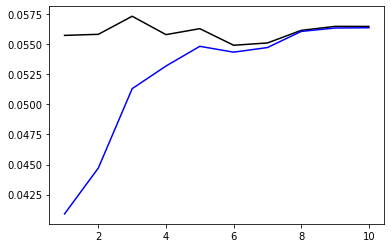

In [44]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(p, ols_bias, 'k')
ax.plot(p, ols_var, 'b')

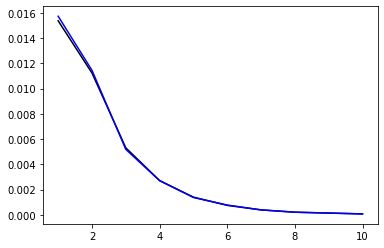

In [45]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_testMSE = test_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_trainMSE = train_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(p, ols_testMSE, 'k')
ax.plot(p, ols_trainMSE, 'b')

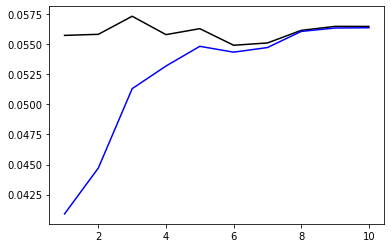

In [46]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(p, ols_bias, 'k')
ax.plot(p, ols_var, 'b')

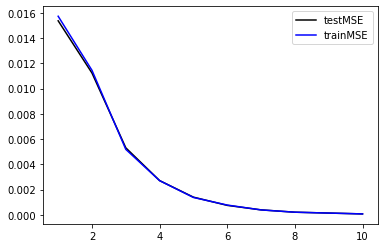

In [47]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_testMSE = test_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_trainMSE = train_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(p, ols_testMSE, 'k', label="testMSE")
ax.plot(p, ols_trainMSE, 'b', label="trainMSE")
ax.legend()